In [3130]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.colors as cm
import matplotlib.pyplot as plt

In [3131]:
train_data = np.loadtxt('VStrain.dt', delimiter=',')

X_train = train_data[:,:-1]
Y_train = train_data[:,-1]

print(X_train.shape)
print(Y_train.shape)


(771, 61)
(771,)


In [3132]:
test_data = np.loadtxt('VStest.dt', delimiter=',')

X_test = test_data[:,:-1]
Y_test = test_data[:,-1]

print(X_test.shape)
print(Y_test.shape)

(771, 61)
(771,)


In [3133]:
counts = np.bincount(Y_train.astype(int))
freq = counts/771
classes = np.arange(25)
counts_dict = dict(zip(classes, counts))
freq_dict = dict(zip(classes, freq))

print("counts_dict: ", counts_dict)
print("freq_dict: ", freq_dict)

counts_dict:  {0: 68, 1: 22, 2: 1, 3: 96, 4: 17, 5: 50, 6: 60, 7: 10, 8: 27, 9: 58, 10: 9, 11: 21, 12: 19, 13: 9, 14: 21, 15: 26, 16: 23, 17: 26, 18: 6, 19: 10, 20: 3, 21: 7, 22: 82, 23: 68, 24: 32}
freq_dict:  {0: 0.08819714656290532, 1: 0.028534370946822308, 2: 0.0012970168612191958, 3: 0.1245136186770428, 4: 0.02204928664072633, 5: 0.0648508430609598, 6: 0.07782101167315175, 7: 0.01297016861219196, 8: 0.03501945525291829, 9: 0.07522697795071336, 10: 0.011673151750972763, 11: 0.027237354085603113, 12: 0.02464332036316472, 13: 0.011673151750972763, 14: 0.027237354085603113, 15: 0.03372243839169909, 16: 0.029831387808041506, 17: 0.03372243839169909, 18: 0.007782101167315175, 19: 0.01297016861219196, 20: 0.0038910505836575876, 21: 0.009079118028534372, 22: 0.10635538261997406, 23: 0.08819714656290532, 24: 0.041504539559014265}


Remove data points belonging to classes with less than 65 training examples

In [3134]:
counts_dict = dict((k, v) for k, v in counts_dict.items() if v >= 65)

print("classes to be kept and their count: ", counts_dict)
print("total number of kept datapoints in train: ", sum(counts_dict.values()))

X_test = np.asarray([x for x,y in zip(X_test,Y_test) if y in counts_dict])
Y_test = np.asarray([y for y in Y_test if y in counts_dict])
X_train = np.asarray([x for x,y in zip(X_train,Y_train) if y in counts_dict])
Y_train = np.asarray([y for y in Y_train if y in counts_dict])

print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)

classes to be kept and their count:  {0: 68, 3: 96, 22: 82, 23: 68}
total number of kept datapoints in train:  314
X_test shape:  (335, 61)
Y_test shape:  (335,)
X_train shape:  (314, 61)
Y_train shape:  (314,)


Normalize data


In [3135]:
X_test = (
    (X_test - X_train.mean(0, keepdims=True))/X_train.std(0, keepdims=True))
X_train = (
    (X_train - X_train.mean(0, keepdims=True))/X_train.std(0, keepdims=True))#Make a mean for each feature, not for each datapoint
#sklearn.preprocessing.StandardScaler

PCA


In [3136]:
pca = PCA(2)
X_pca = pca.fit_transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_pca.shape)
print(pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1])

original shape:    (314, 61)
transformed shape: (314, 2)
0.4322986394620555


Text(0.5, 1.0, 'Training data projected on 2 PC')

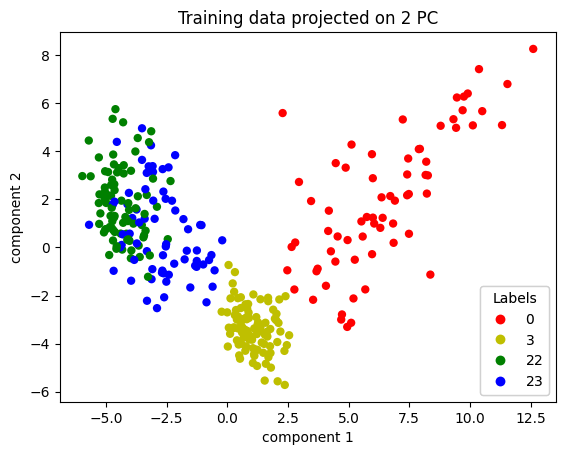

In [3137]:
cmap = cm.ListedColormap(['r','g','b','y','k'], N=28)

fig, ax = plt.subplots()

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_train, edgecolor='none', cmap=cmap)

legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Labels")
ax.add_artist(legend1)

plt.xlabel('component 1')
plt.ylabel('component 2')

plt.title('Training data projected on 2 PC')

Text(0.5, 1.0, 'Training data projected on 2 PC')

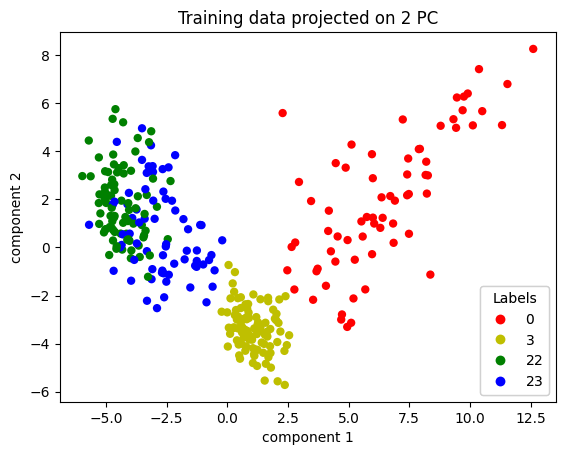

In [ ]:
cmap = cm.ListedColormap(['r','g','b','y','k'], N=28)

fig, ax = plt.subplots()

scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=Y_train, edgecolor='none', cmap=cmap)

legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Labels")
ax.add_artist(legend1)

plt.xlabel('component 1')
plt.ylabel('component 2')

plt.title('Training data projected on 2 PC')

KMeans and KMeans++ cluster

In [3138]:
from sklearn.cluster import KMeans

In [3139]:
FourMeans = KMeans(n_clusters=4, init='random')
FourMeans.fit(X_train) 
clusters = pca.transform(FourMeans.cluster_centers_)
print(clusters)

FourMeansPP = KMeans(n_clusters=4, init='k-means++')
FourMeansPP.fit(X_train)
clustersPP = pca.transform(FourMeansPP.cluster_centers_)
print(clustersPP)

[[ 0.97067617 -3.17691965]
 [ 5.42938335  0.74340011]
 [-3.77199157  1.40677676]
 [ 9.14897478  5.13973891]]
[[ 5.42938335  0.74340011]
 [ 0.97067617 -3.17691965]
 [-3.77199157  1.40677676]
 [ 9.14897478  5.13973891]]


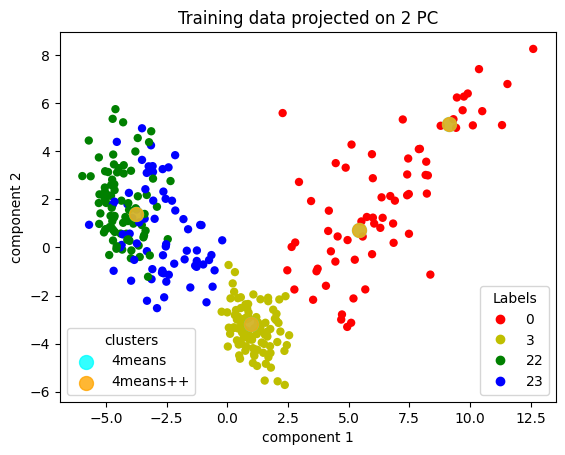

In [3140]:
scatter = ax.scatter(clusters[:,0], clusters[:,1], c='cyan', label='4means', s=100, alpha=0.8)
scatter = ax.scatter(clustersPP[:,0], clustersPP[:,1], c='orange', label='4means++', s=100, alpha=0.8)

legend2 = ax.legend(loc='lower left', title='clusters')
fig